In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [15]:
df = pd.read_csv("../dataset/Customer Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [16]:
df.shape

(8950, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [18]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [19]:

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [20]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [21]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [23]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID",'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','MINIMUM_PAYMENTS'],axis=1,inplace=True)

In [24]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

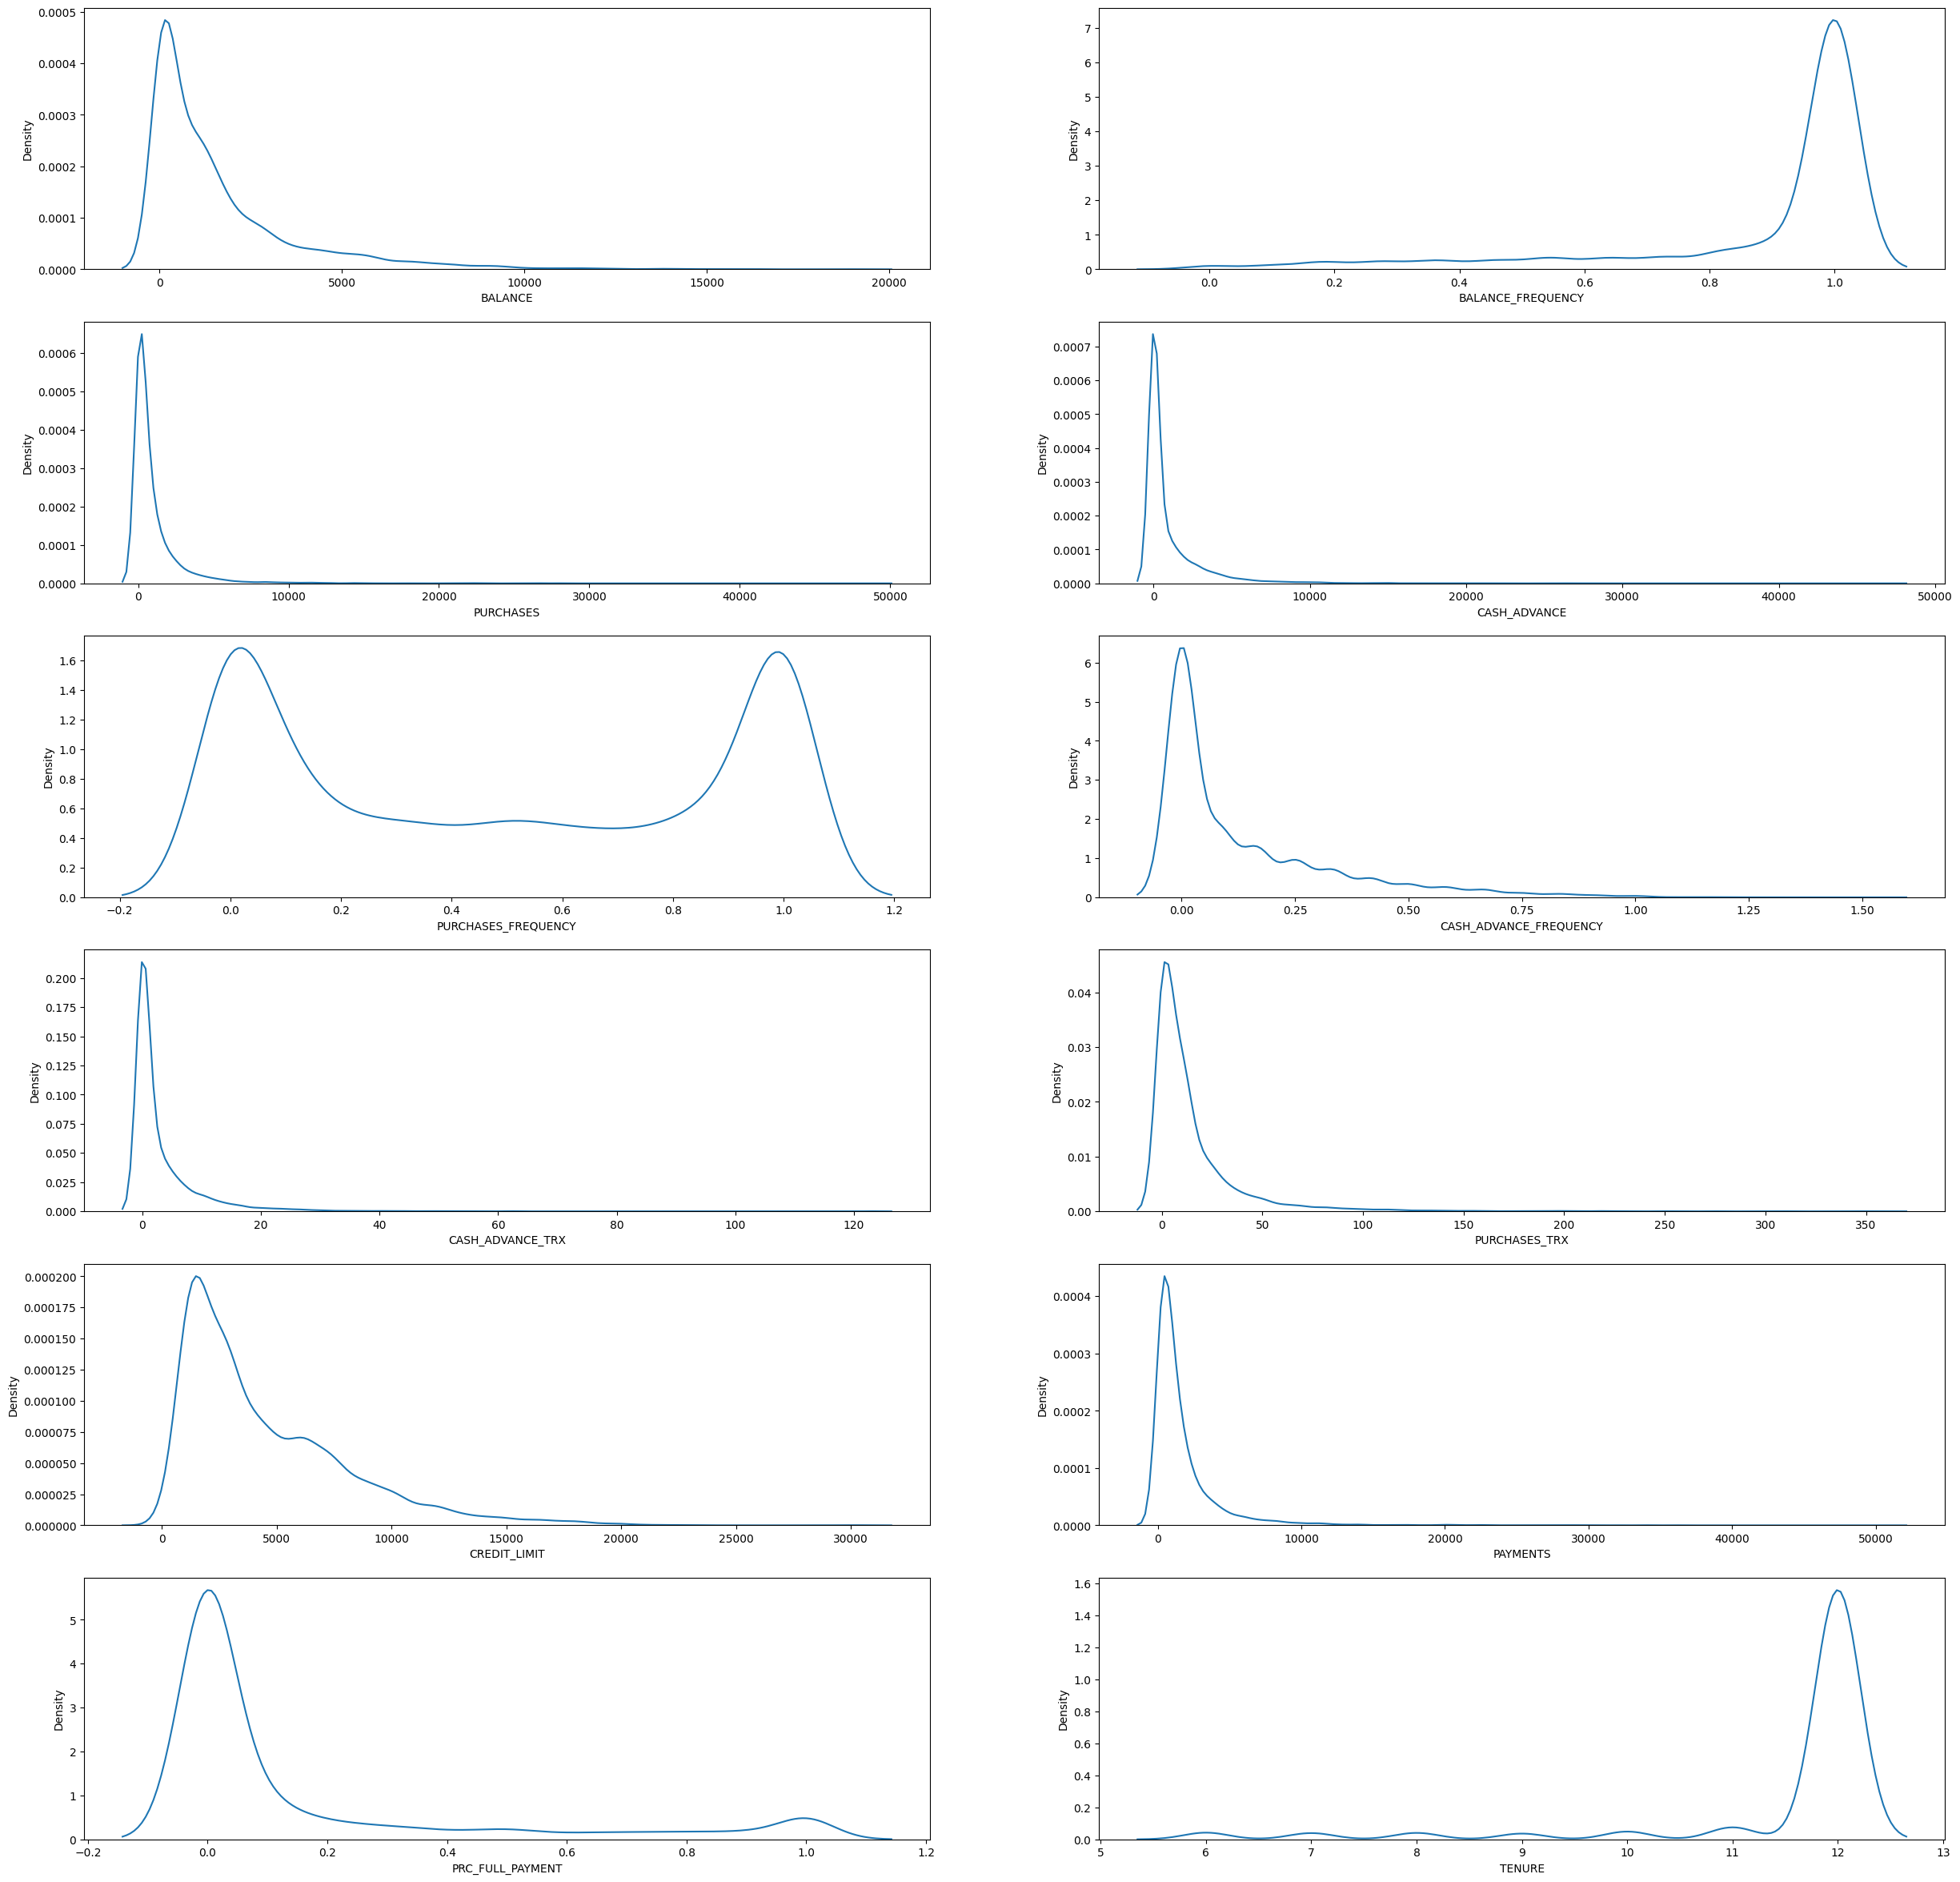

In [25]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

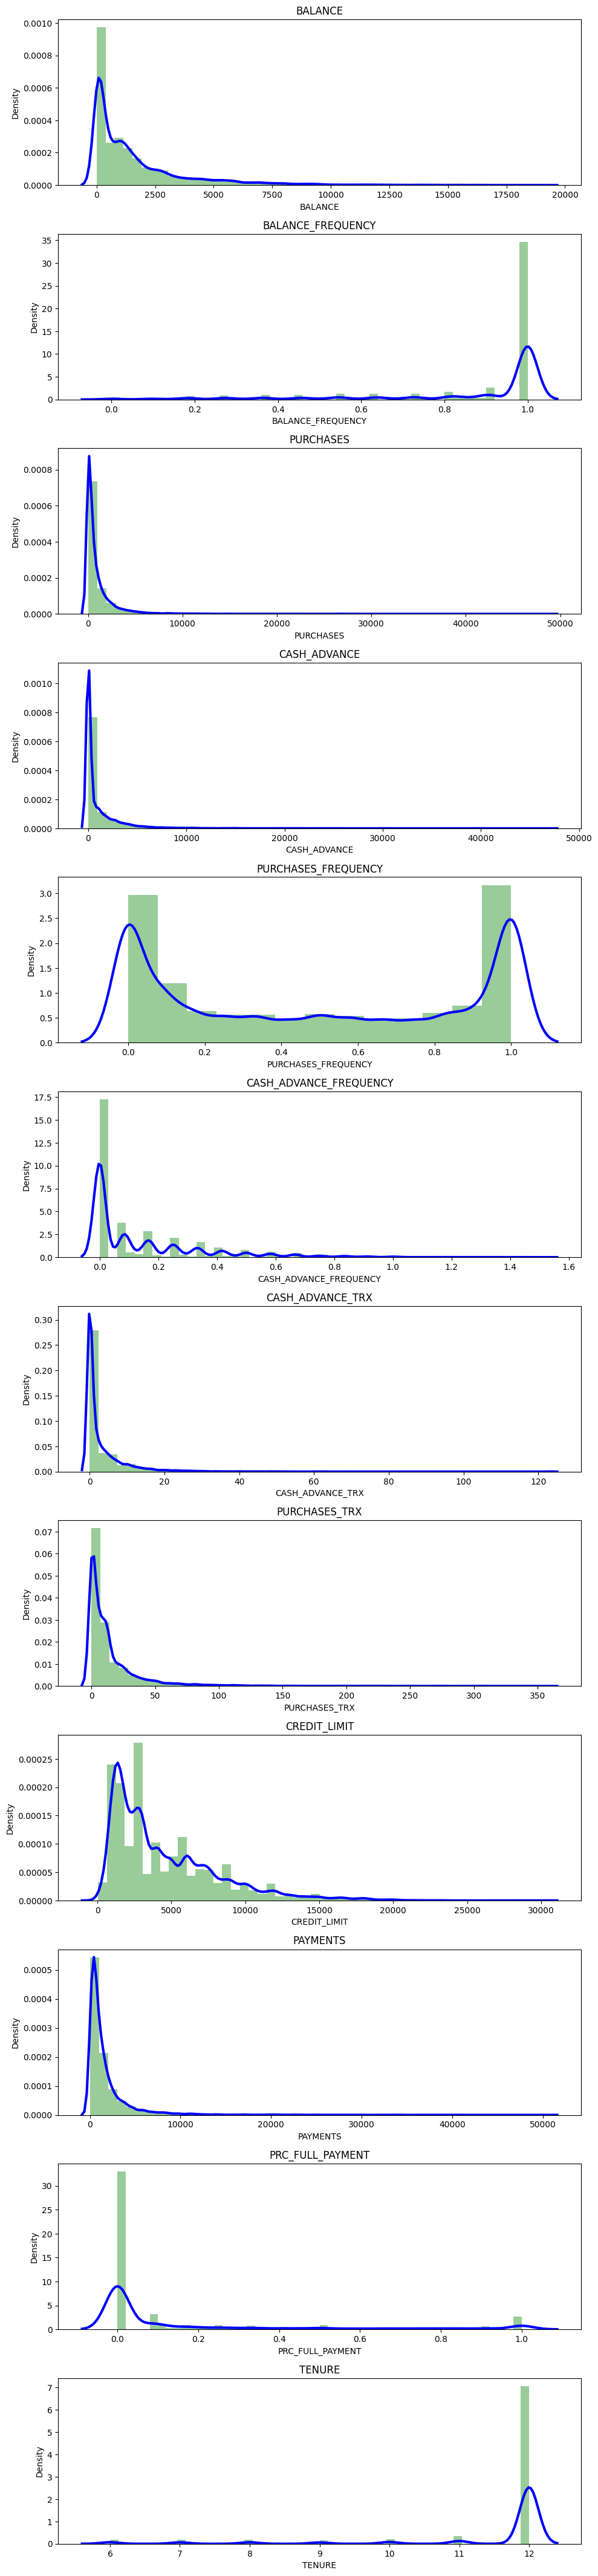

In [26]:
plt.figure(figsize=(10,60))
for i in range(0,12):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

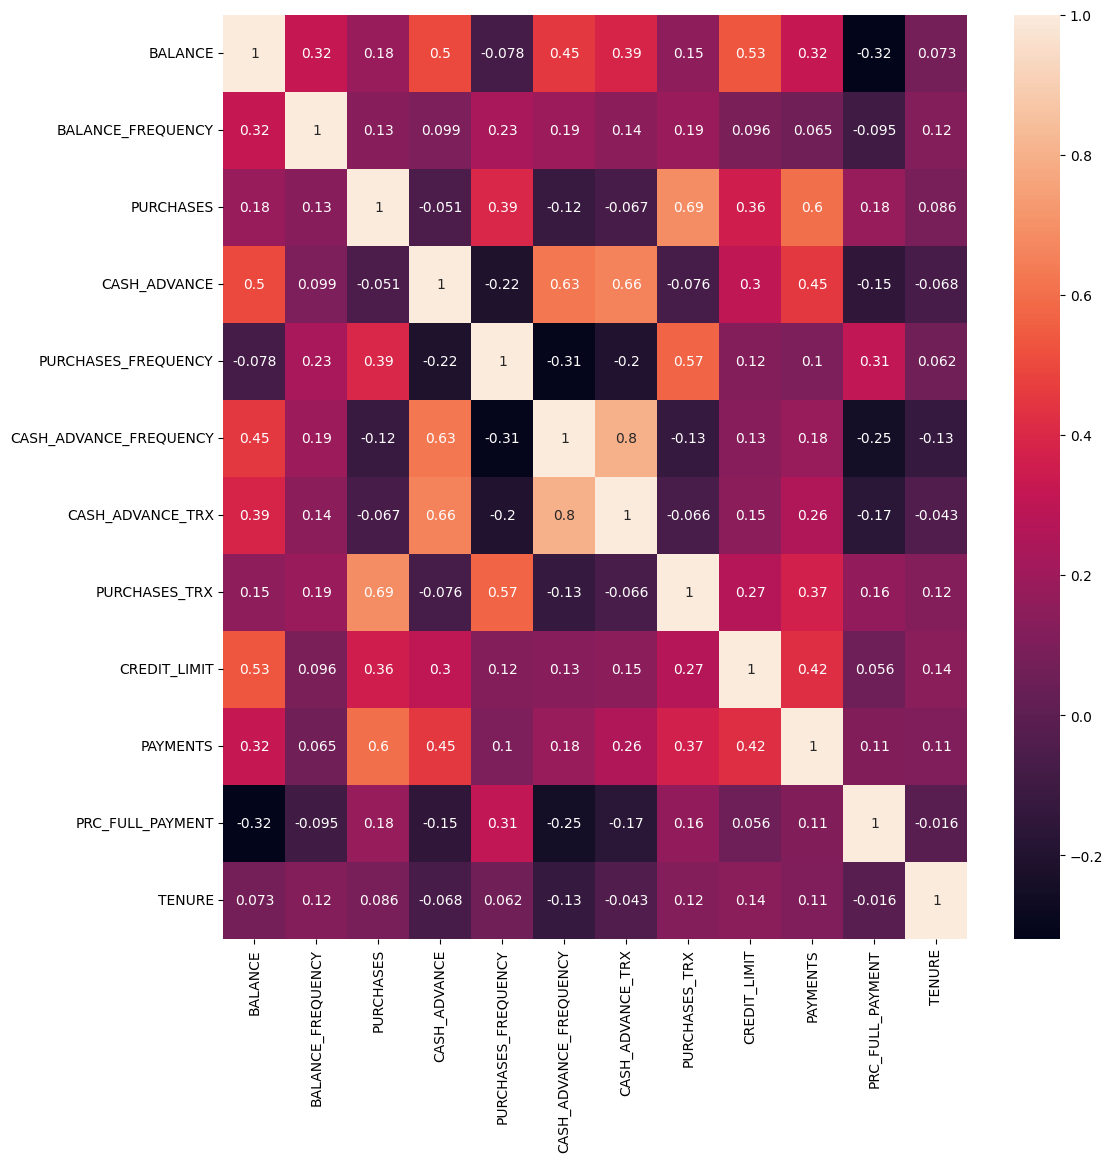

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [28]:
scaled_df = scalar.fit_transform(df)

In [29]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.468991,-0.970894
1,2.206537,-1.033535
2,-0.316592,0.850899
3,-0.381012,-0.570296
4,-1.100426,-0.937614
...,...,...
8945,-1.769658,-0.078334
8946,-1.538477,-0.489998
8947,-1.786394,-0.617320
8948,-1.239374,-1.937982


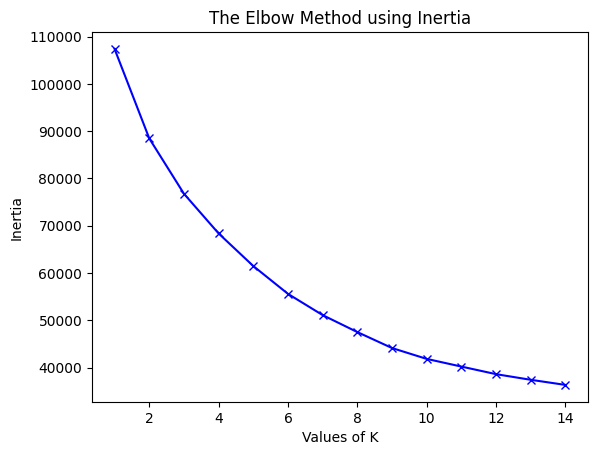

In [30]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [31]:

kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

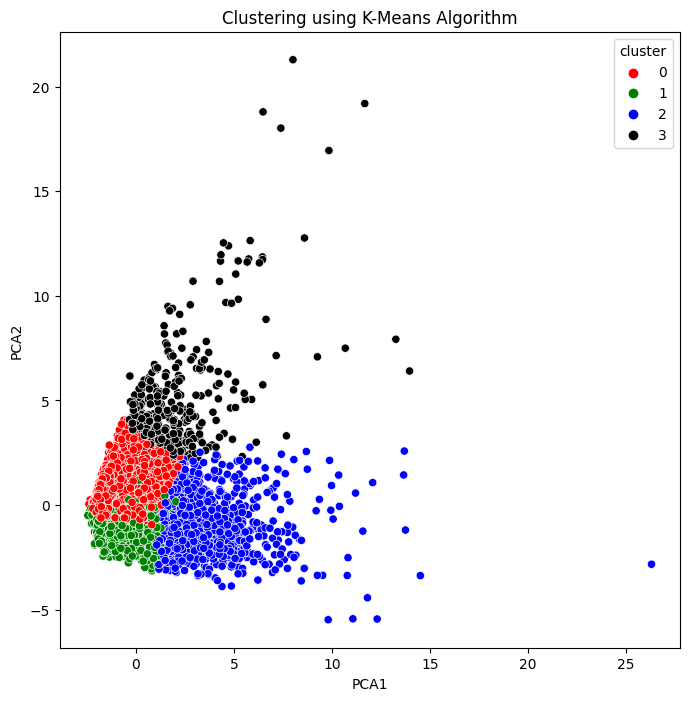

In [32]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [33]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,914.979922,0.947181,1327.643011,174.233682,0.867609,0.034776,0.645470,22.436411,4374.994589,1407.046397,0.285239,11.657085
1,986.363821,0.776900,249.878409,589.277752,0.180181,0.115820,2.132496,2.920041,3136.195969,919.995292,0.065656,11.397232
2,4471.266364,0.969267,559.565651,4423.002880,0.304900,0.482080,14.048666,8.355573,7444.273584,3447.243234,0.035860,11.392465
3,3956.587515,0.979311,8237.480424,686.570302,0.936612,0.071740,1.924242,98.009091,10413.333333,8133.818711,0.277296,11.960606


In [34]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,0.000000,12,1
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12,2
2,2495.148862,1.000000,773.17,0.000000,1.000000,0.000000,0,12,7500.0,622.066742,0.000000,12,0
3,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000000,1.000000,0.000000,0,6,1000.0,325.594462,0.500000,6,0
8946,19.183215,1.000000,300.00,0.000000,1.000000,0.000000,0,6,1000.0,275.861322,0.000000,6,0
8947,23.398673,0.833333,144.40,0.000000,0.833333,0.000000,0,5,1000.0,81.270775,0.250000,6,0
8948,13.457564,0.833333,0.00,36.558778,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6,1


In [35]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,0.0,1.000000,0.0,0,12,7500.0,622.066742,0.00,12,0
5,1809.828751,1.000000,1333.28,0.0,0.666667,0.0,0,8,1800.0,1400.057770,0.00,12,0
7,1823.652743,1.000000,436.20,0.0,1.000000,0.0,0,12,2300.0,679.065082,0.00,12,0
10,1293.124939,1.000000,920.12,0.0,1.000000,0.0,0,12,1200.0,1083.301007,0.00,12,0
12,1516.928620,1.000000,3217.99,0.0,1.000000,0.0,0,26,3000.0,608.263689,0.25,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.0,1.000000,0.0,0,6,1000.0,475.523262,1.00,6,0
8942,40.829749,1.000000,113.28,0.0,1.000000,0.0,0,6,1000.0,94.488828,0.25,6,0
8945,28.493517,1.000000,291.12,0.0,1.000000,0.0,0,6,1000.0,325.594462,0.50,6,0
8946,19.183215,1.000000,300.00,0.0,1.000000,0.0,0,6,1000.0,275.861322,0.00,6,0


In [36]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.000000,0.166667,0.000000,0,2,1000.0,201.802084,0.00,12,1
3,1666.670542,0.636364,1499.00,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,0.00,12,1
4,817.714335,1.000000,16.00,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,0.00,12,1
8,1014.926473,1.000000,861.49,0.000000,0.333333,0.000000,0,5,7000.0,688.278568,0.00,12,1
9,152.225975,0.545455,1281.60,0.000000,0.166667,0.000000,0,3,11000.0,1164.770591,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,239.891038,0.333333,0.166667,2,2,1000.0,72.530037,0.00,6,1
8943,5.871712,0.500000,20.90,0.000000,0.166667,0.000000,0,1,500.0,58.644883,0.00,6,1
8944,193.571722,0.833333,1012.73,0.000000,0.333333,0.000000,0,2,4000.0,0.000000,0.00,6,1
8948,13.457564,0.833333,0.00,36.558778,0.000000,0.166667,2,0,500.0,52.549959,0.25,6,1


In [37]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,6442.945483,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12,2
15,6886.213231,1.000000,1611.70,2301.491267,0.500000,0.166667,4,11,8000.0,1993.439277,0.000000,12,2
23,3800.151377,0.818182,4248.35,7974.415626,1.000000,0.333333,13,13,9000.0,9479.043842,0.000000,12,2
24,5368.571219,1.000000,0.00,798.949863,0.000000,0.363636,4,0,6000.0,1422.726707,0.000000,11,2
28,7152.864372,1.000000,387.05,2236.145259,0.666667,0.833333,16,8,10500.0,1601.448347,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,14926.790590,0.428571,0.571429,10,3,10000.0,8157.666434,0.200000,7,2
8858,812.934042,1.000000,50.00,2185.500596,0.142857,1.000000,16,1,3000.0,726.683966,0.000000,7,2
8869,2171.222526,1.000000,791.18,2056.602480,0.428571,0.571429,6,8,3000.0,300.088696,0.000000,7,2
8915,381.341657,1.000000,78.00,934.808869,1.000000,0.666667,16,6,1000.0,143.118373,0.000000,6,2


In [38]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,0.000000,1.000000,0.000000,0,64,13500.0,6354.314328,1.000000,12,3
21,6369.531318,1.000000,6359.95,229.028245,1.000000,0.333333,6,92,11250.0,2077.959051,0.000000,12,3
90,9381.255094,1.000000,5100.07,370.737197,1.000000,0.083333,1,46,9000.0,6409.496345,0.000000,12,3
102,3539.801912,1.000000,2823.80,0.000000,0.916667,0.000000,0,75,5700.0,9172.788366,0.083333,12,3
120,8504.876253,1.000000,6724.26,1686.599777,1.000000,0.500000,10,85,17000.0,1888.756861,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,530.574252,1.000000,5221.42,0.000000,1.000000,0.000000,0,135,3000.0,4590.877822,0.583333,12,3
8215,4436.557694,1.000000,6005.90,567.971877,1.000000,0.083333,1,61,10500.0,1650.425296,0.000000,12,3
8541,3326.323283,1.000000,8209.77,0.000000,1.000000,0.000000,0,130,10000.0,1942.074765,0.083333,12,3
8689,368.318662,0.909091,8053.95,0.000000,0.833333,0.000000,0,46,2000.0,7966.582037,0.777778,12,3


<Axes: xlabel='Cluster', ylabel='count'>

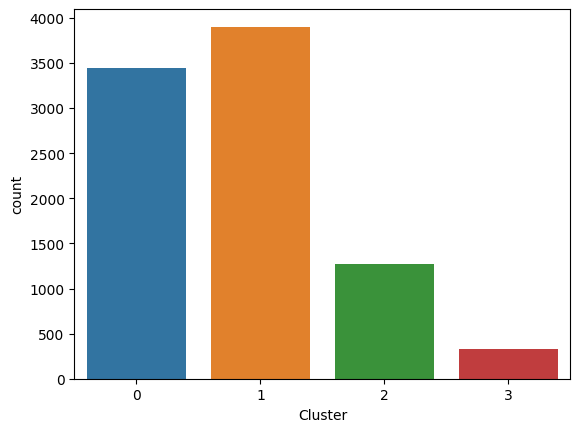

In [39]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

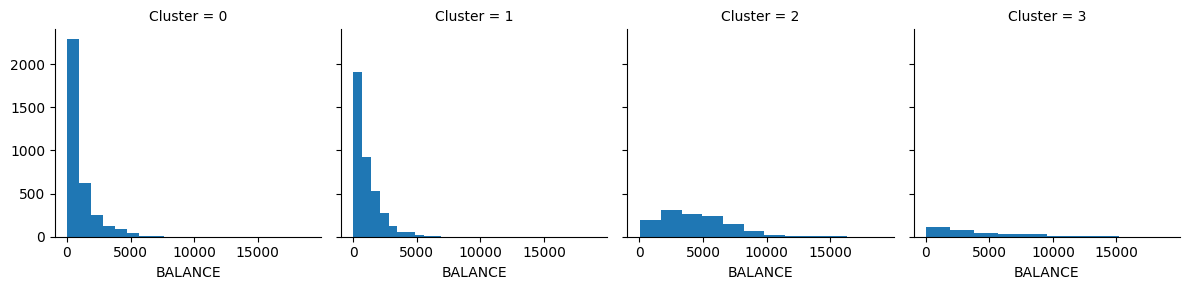

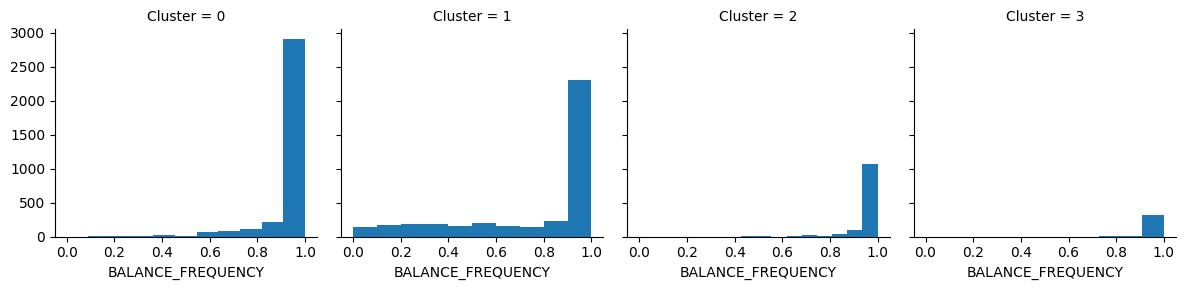

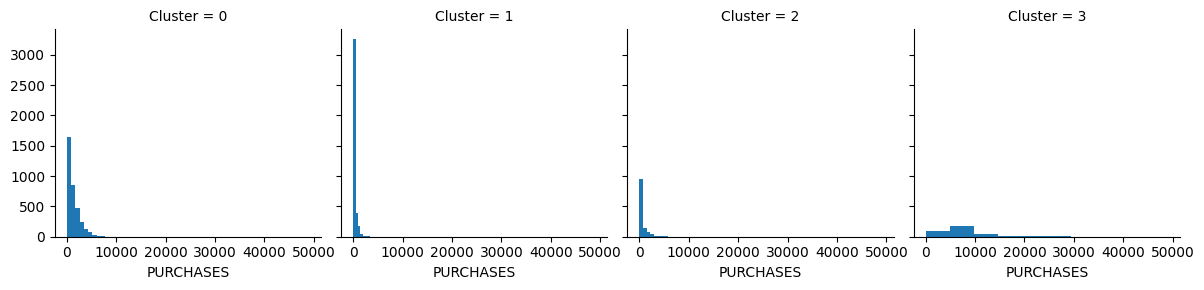

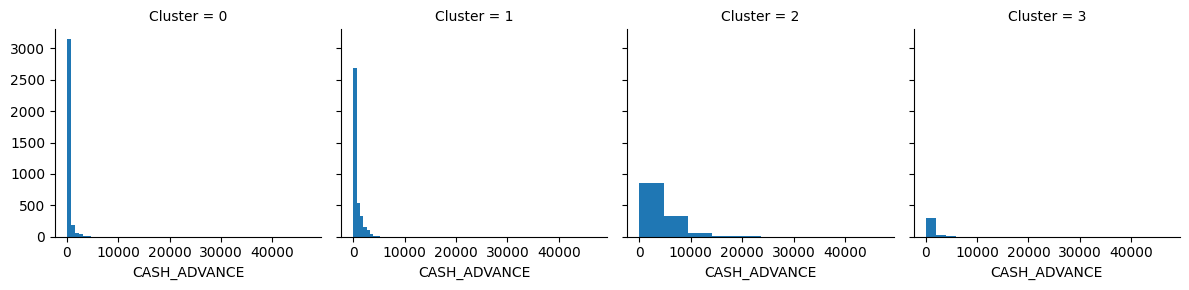

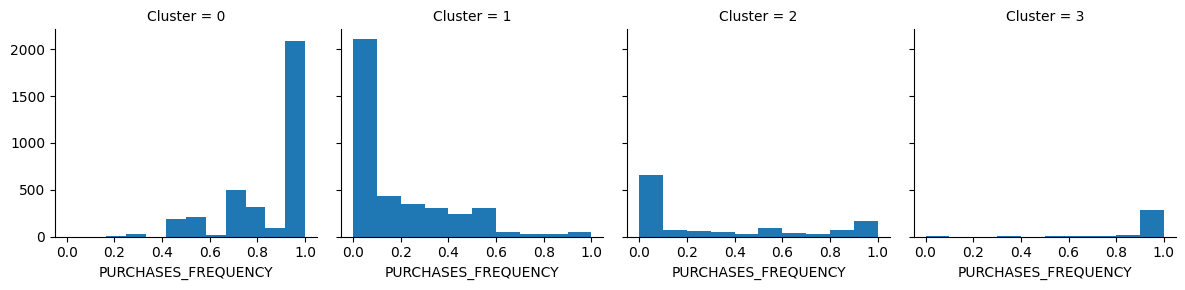

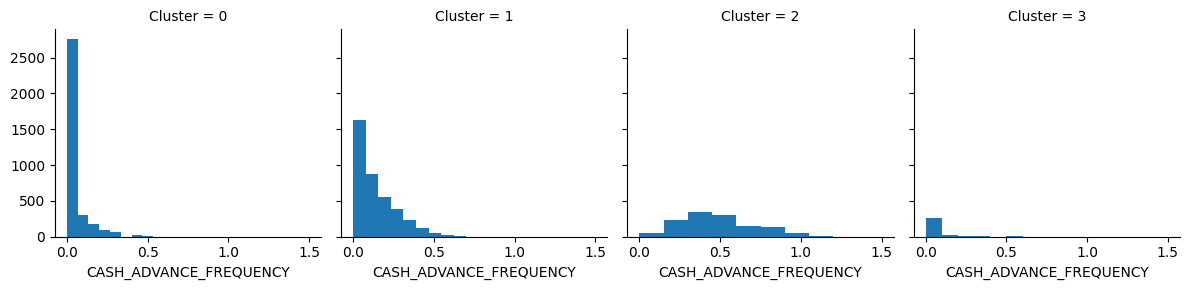

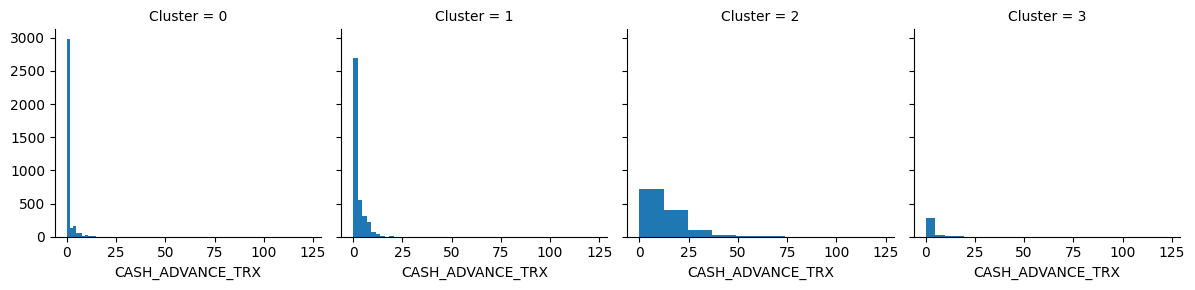

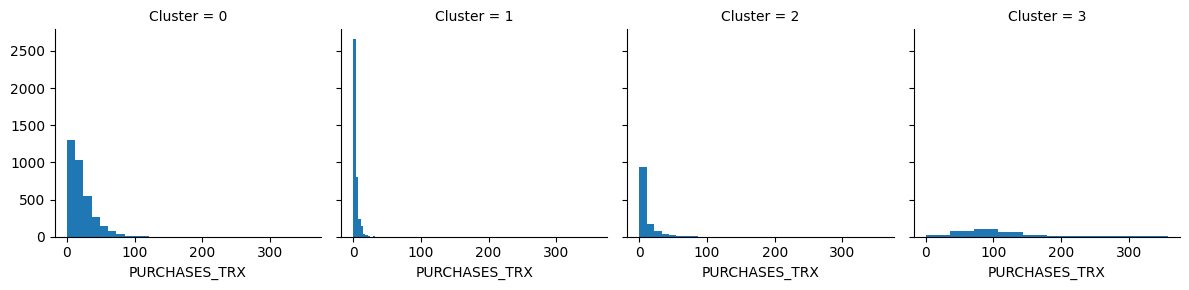

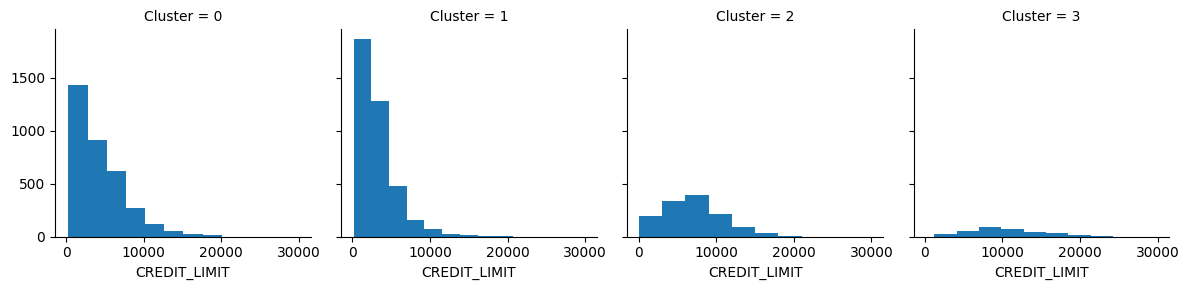

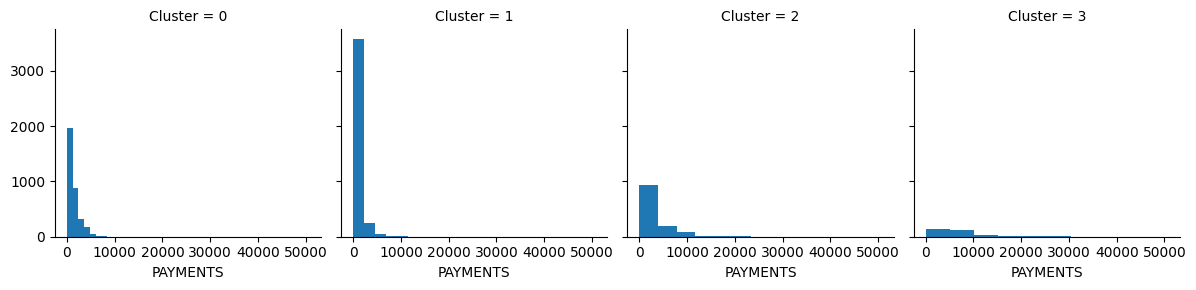

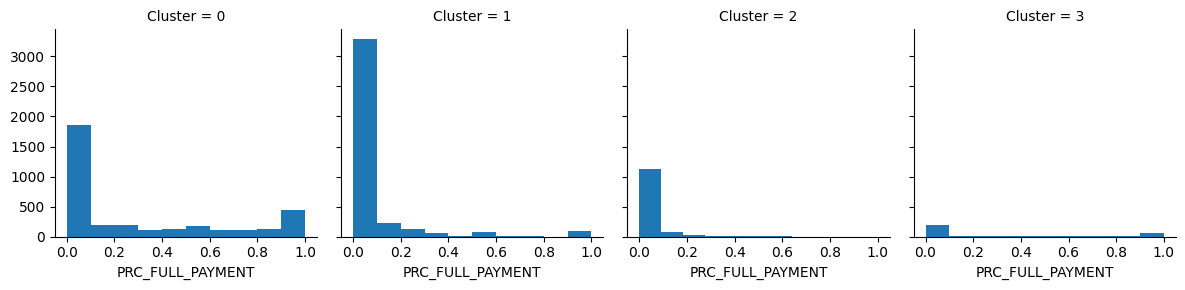

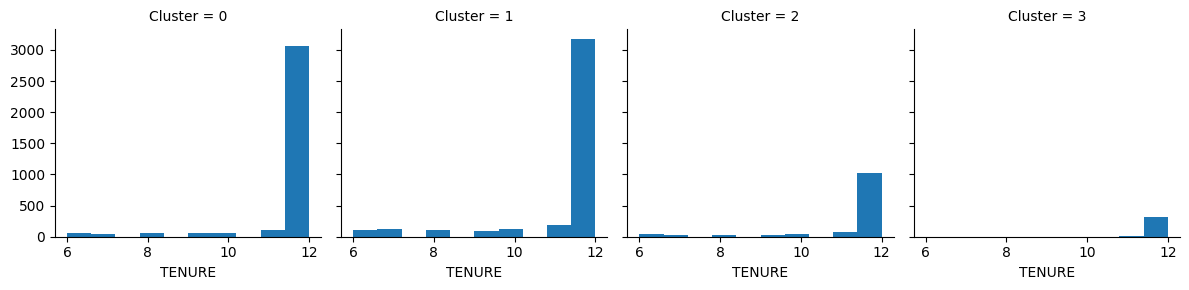

In [40]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [41]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "../models/Clustering/kmeans_model.pkl")

['kmeans_model.pkl']

In [42]:
cluster_df.to_csv("../dataset/Clustered_Customer_Data.csv")

In [43]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [44]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
3612,1106.910402,1.000000,515.98,0.000000,0.500000,0.000000,0,7,12000.0,1867.692351,0.000000,12
7393,1099.649455,1.000000,0.00,72.841356,0.000000,0.166667,2,0,1200.0,322.777824,0.000000,12
1121,1373.174839,1.000000,215.00,0.000000,0.250000,0.000000,0,10,8500.0,598.012696,0.000000,12
7706,3179.056936,1.000000,4407.78,0.000000,1.000000,0.000000,0,29,9000.0,1257.677615,0.000000,12
590,2450.031338,1.000000,1678.07,0.000000,1.000000,0.000000,0,33,6500.0,682.930065,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3671,1013.706876,1.000000,2143.28,3610.572430,0.916667,0.083333,1,34,7500.0,2945.957395,0.000000,12
8189,114.297852,0.909091,994.54,0.000000,0.833333,0.000000,0,18,1000.0,1099.568918,0.444444,12
6566,4661.423201,1.000000,0.00,5263.831799,0.000000,0.583333,10,0,6500.0,2943.485063,0.000000,12
6020,214.592814,0.363636,0.00,1306.528549,0.000000,0.083333,3,0,3000.0,28.361650,0.000000,12


In [45]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 969   36   16   13]
 [  39 1116   28    0]
 [  14   24  324    1]
 [  13    1    5   86]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1034
           1       0.95      0.94      0.95      1183
           2       0.87      0.89      0.88       363
           3       0.86      0.82      0.84       105

    accuracy                           0.93      2685
   macro avg       0.90      0.90      0.90      2685
weighted avg       0.93      0.93      0.93      2685



In [47]:


 
import pickle
filename = '../models/classification/final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open("../models/classification/final_model.sav", 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9292364990689013 % Acuuracy
